# Imports

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read dataset
<a href="https://www.kaggle.com/datasets/divyansh22/online-gaming-anxiety-data" title="Online gaming anxiety data">Online gaming anxiety data</a>

In [7]:
df = pd.read_csv('GamingStudy_data.csv')
df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [8]:
# Rename certain columns for ease of use
df.rename({'earnings':'Earnings', 'whyplay':'WhyPlay', 'highestleague':'HighestLeague', 'streams':'Streams', 'accept':'Accept'}, inplace = True, axis=1)
df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,Accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


# Univariate analysis

<AxesSubplot:>

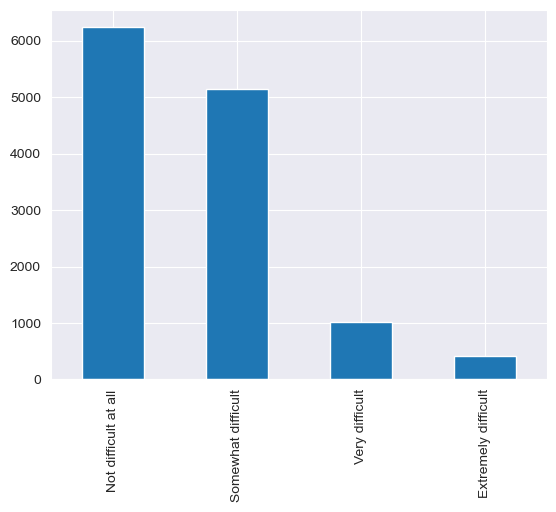

In [9]:
df['GADE'].value_counts().plot(kind='bar')

# Data preprocessing

In [10]:
# Check for nan values
df.isna().sum()

S. No.                 0
Timestamp              0
GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
Earnings               0
WhyPlay                0
League              1838
HighestLeague      13464
Streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175


In [11]:
# Remove useless id column, accept terms of service column and timestamp column
# Also remove both ISO_3 columns as they have missing data and there are two columns that represent the exact same thing
# Note: Narcissism was also removed since this column has little to no correlation with GADE and has missing data
df.drop(columns=['S. No.', 'Accept', 'Narcissism', 'Residence_ISO3', 'Birthplace_ISO3', 'Timestamp'], axis=1, inplace=True)

In [12]:
# Shuffle data to prevent none existent order corr
df = df.sample(frac=1, random_state=1)

In [13]:
# Drop samples that miss data that we are trying to predict
df['GADE'].dropna()

# Drop columns that are missing too much data
df.drop(columns=['League', 'HighestLeague'])

# Replace nan values of numerical columns with the mean of that column
df_age_mean = df['Hours'].mean()
df['Age'].fillna(df_age_mean, inplace=True)
df_streams_mean = df['Streams'].mean()
df['Streams'].fillna(df_streams_mean, inplace=True)

# TODO: Fix all 17 SPIN question and SPIN_T NaN's

In [14]:
# Convert categorical data to numerics for correlations
df = pd.get_dummies(df, columns=['GADE', 'Work', 'Reference'])
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,...,GADE_Somewhat difficult,GADE_Very difficult,Work_Employed,Work_Student at college / university,Work_Student at school,Work_Unemployed / between jobs,Reference_CrowdFlower,Reference_Other,Reference_Reddit,Reference_TeamLiquid.net
8371,1,0,1,0,0,2,0,2,6,2,...,0,0,0,0,0,1,0,0,1,0
10709,1,2,1,1,1,0,1,5,6,5,...,1,0,1,0,0,0,0,0,1,0
12216,3,3,3,3,2,3,2,1,2,1,...,0,1,0,1,0,0,0,0,1,0
7617,0,0,1,0,0,2,0,6,7,7,...,0,0,0,0,1,0,0,0,1,0
12794,0,0,0,0,0,1,0,2,2,6,...,0,0,0,1,0,0,0,0,1,0


# Data exploration

<AxesSubplot:>

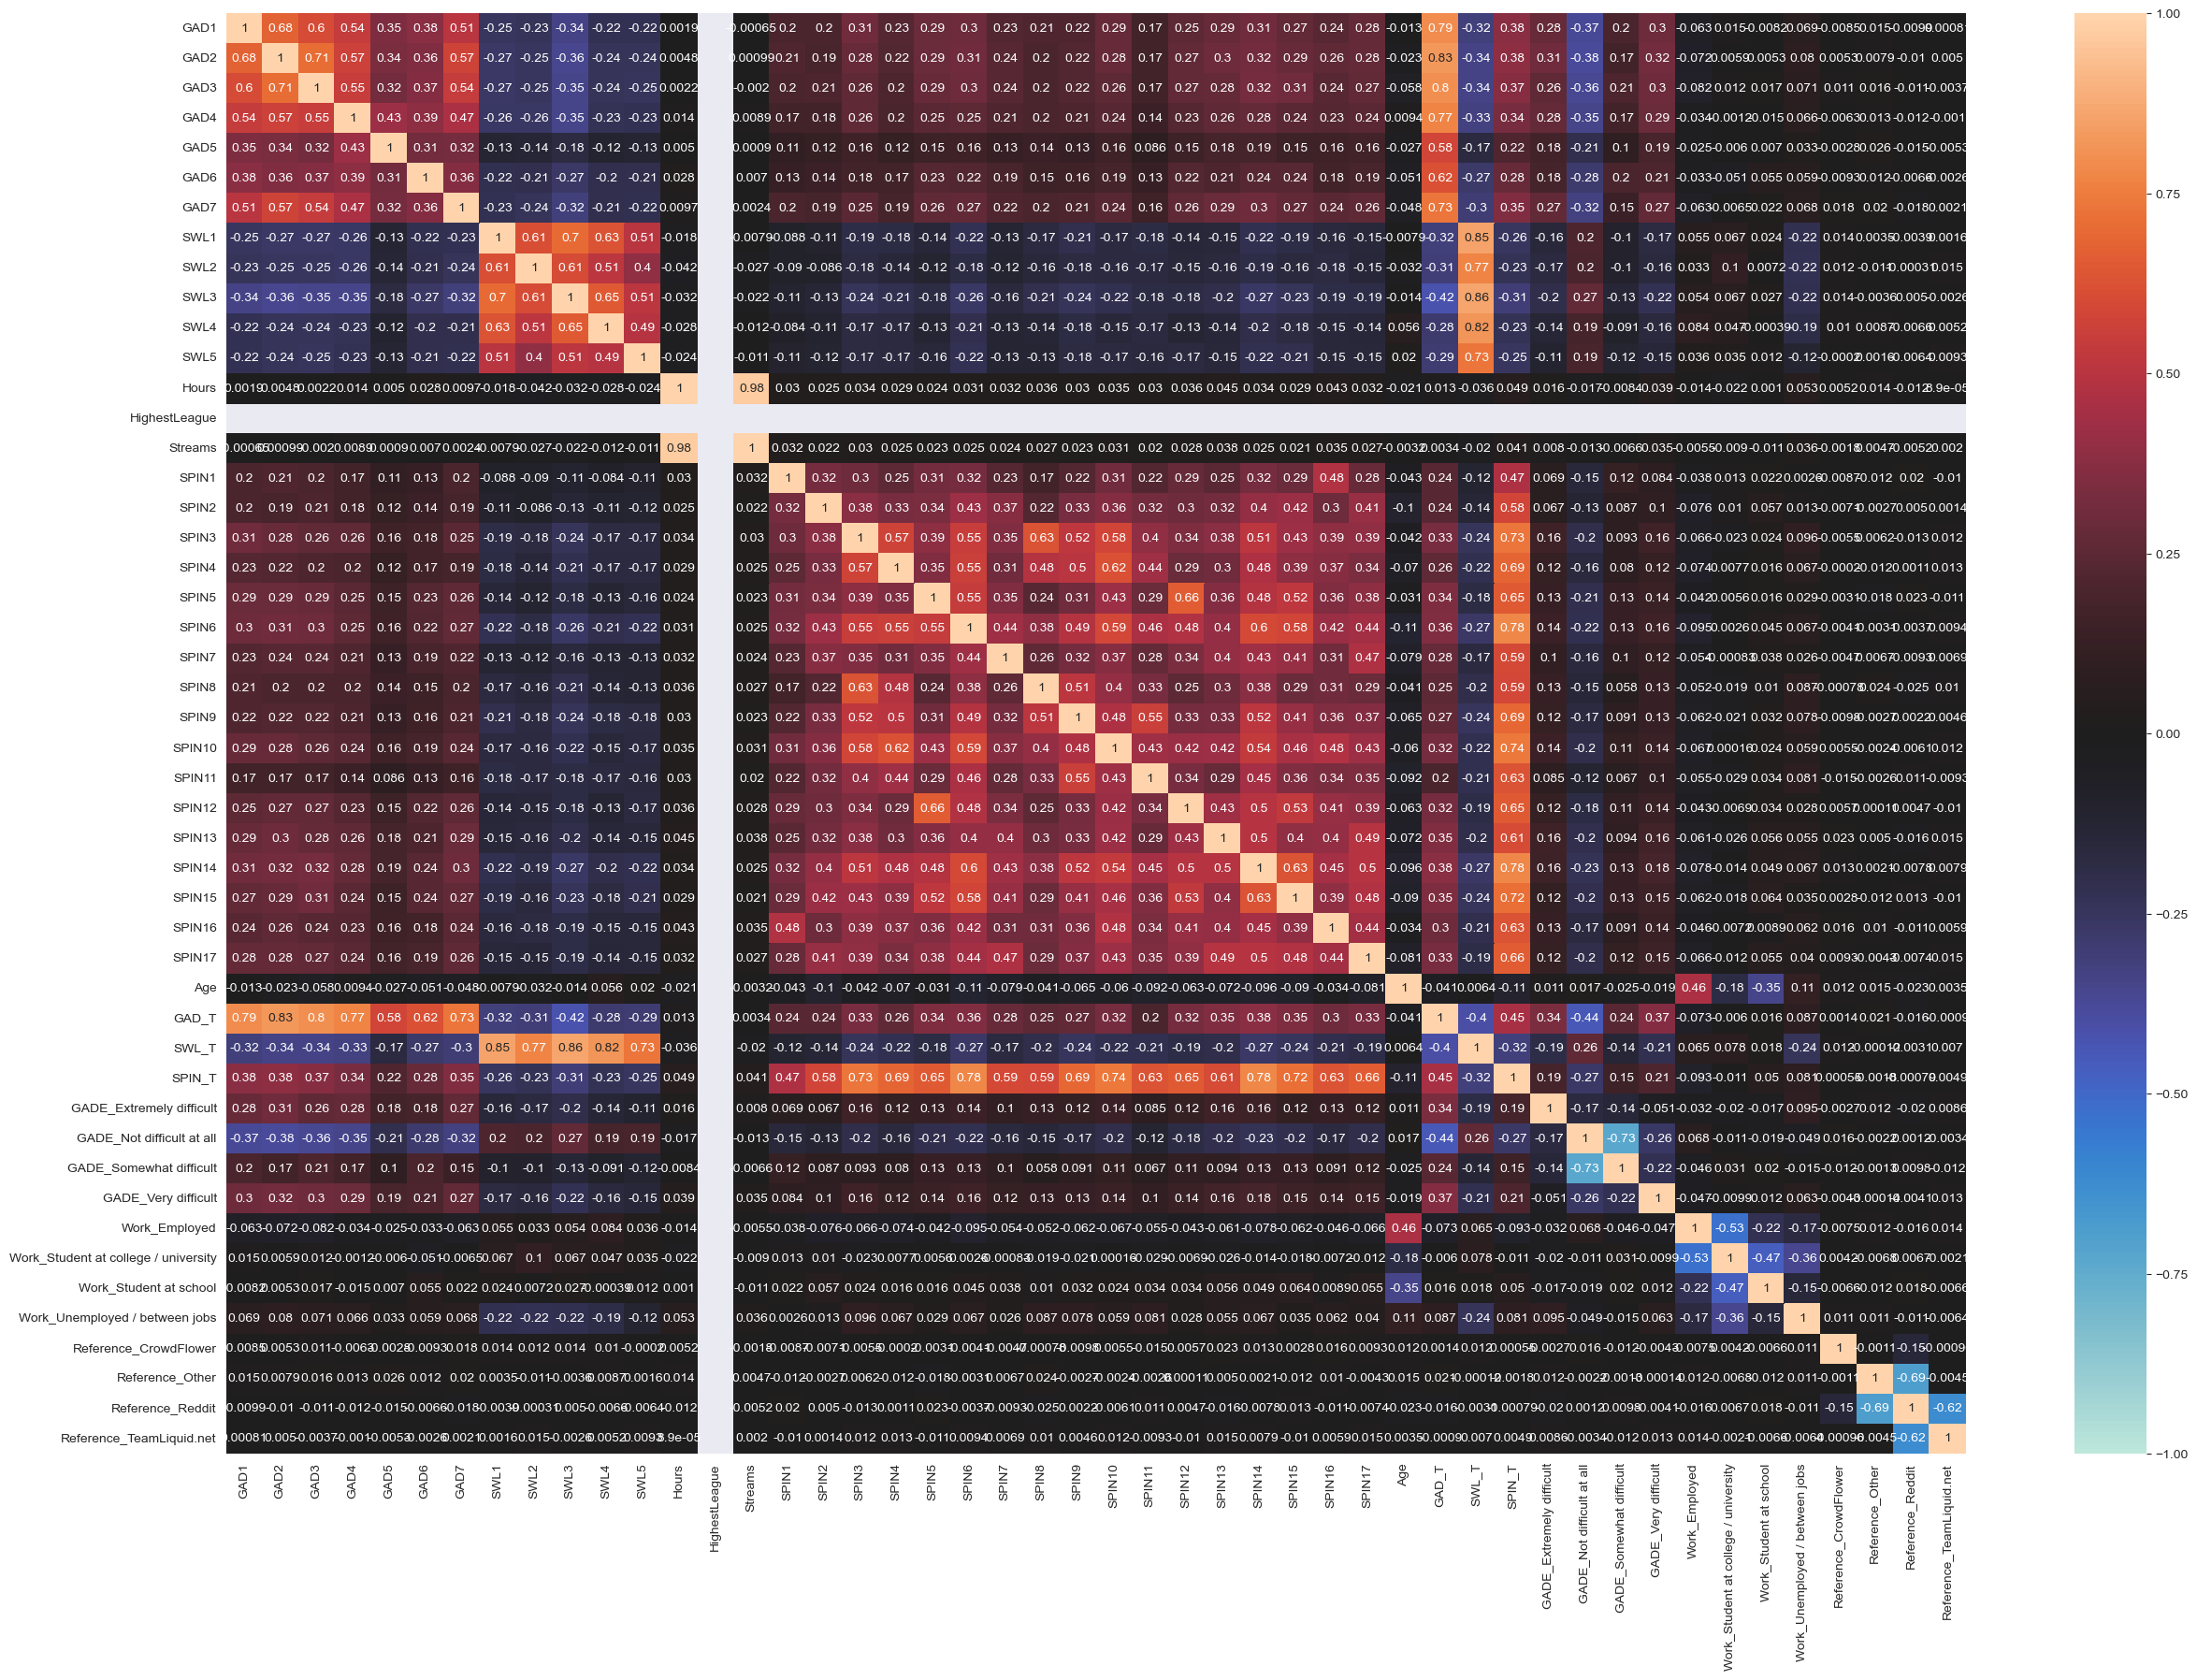

In [15]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)